**PART 1 : EDA**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'purchases.txt' is tab-separated, but possibly with extra spaces:
data = pd.read_csv('/content/purchases (2).txt', header=None, sep='\s+', engine='python', decimal='.')
# Changed sep to '\s+' to handle any whitespace (tabs or spaces) as delimiters

# Add headers and interpret the last column as a date, extract year of purchase
data.columns = ['customer_id', 'purchase_amount', 'date_of_purchase']
data['date_of_purchase'] = pd.to_datetime(data['date_of_purchase'], format="%Y-%m-%d")
data['year_of_purchase'] = data['date_of_purchase'].dt.year
data.head()

,customer_id,purchase_amount,date_of_purchase,year_of_purchase
0,760,25.0,2009-11-06,2009
1,860,50.0,2012-09-28,2012
2,1200,100.0,2005-10-25,2005
3,1420,50.0,2009-07-09,2009
4,1940,70.0,2013-01-25,2013


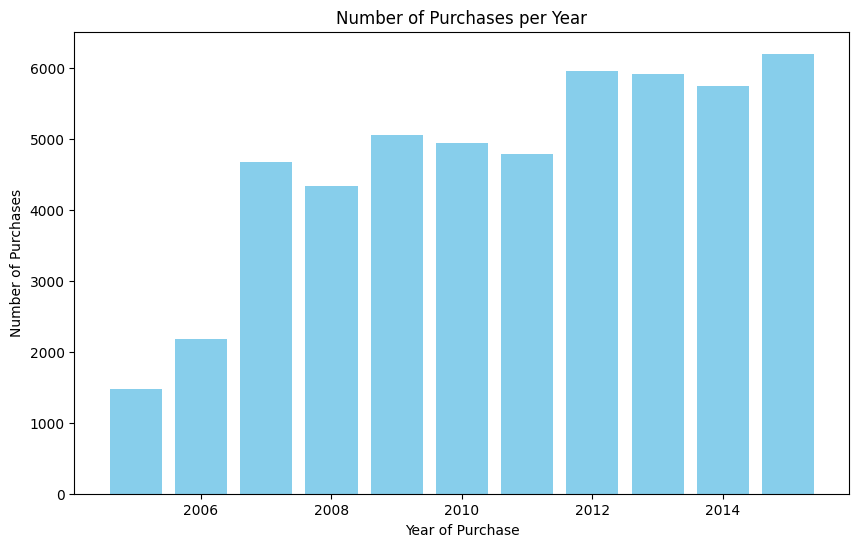

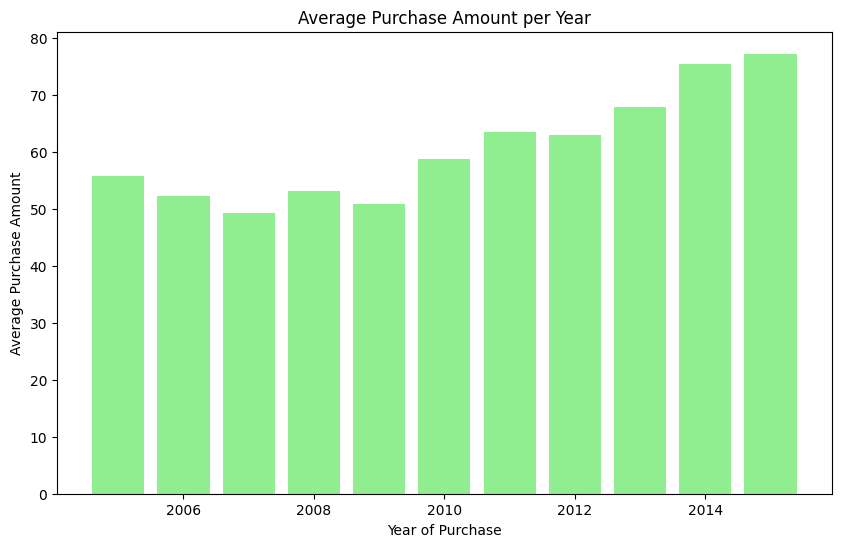

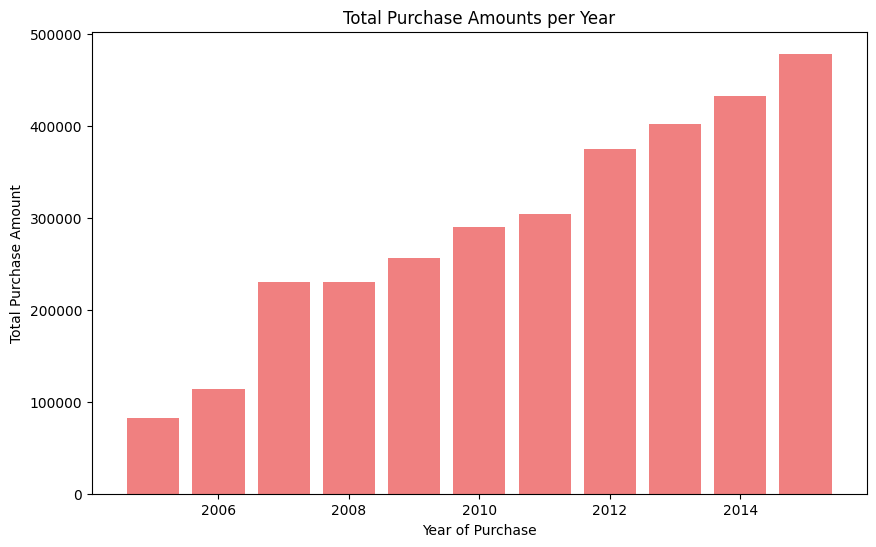

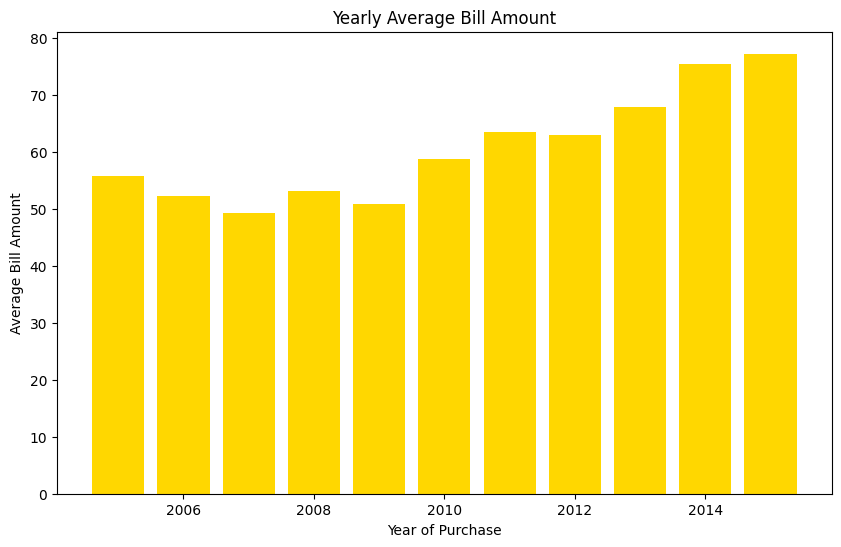

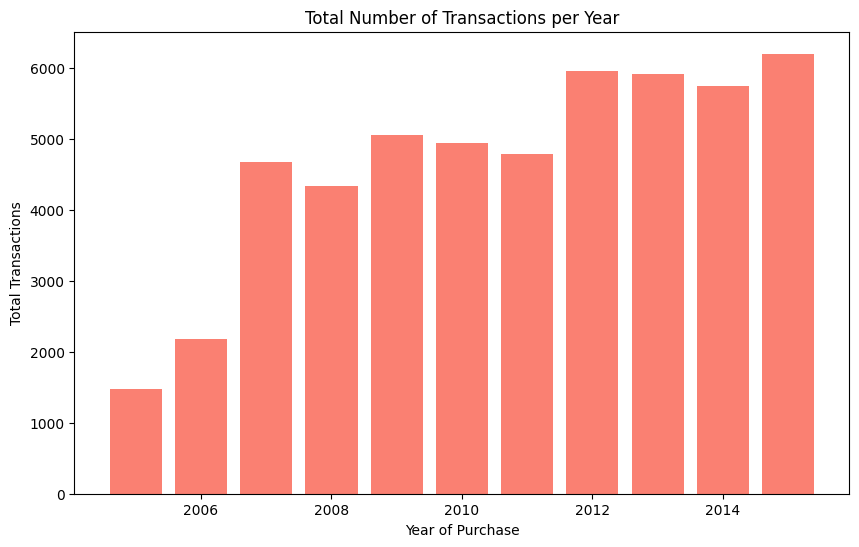

    year_of_purchase  counter  avg_amount  sum_amount  avg_bill_amount  \
0               2005     1470   55.826122    82064.40        55.826122   
1               2006     2182   52.250454   114010.49        52.250454   
2               2007     4674   49.264014   230260.00        49.264014   
3               2008     4331   53.071780   229853.88        53.071780   
4               2009     5054   50.745253   256466.51        50.745253   
5               2010     4939   58.740012   290116.92        58.740012   
6               2011     4785   63.519300   303939.85        63.519300   
7               2012     5960   62.913312   374963.34        62.913312   
8               2013     5912   67.931357   401610.18        67.931357   
9               2014     5739   75.390347   432665.20        75.390347   
10              2015     6197   77.197697   478394.13        77.197697   

    total_transactions  
0                 1470  
1                 2182  
2                 4674  
3          

In [ ]:
# Explore the data using simple SQL-like statements
# Number of purchases per year
x = data.groupby('year_of_purchase').size().reset_index(name='counter')
plt.figure(figsize=(10, 6))
plt.bar(x['year_of_purchase'], x['counter'], color='skyblue')
plt.title('Number of Purchases per Year')
plt.xlabel('Year of Purchase')
plt.ylabel('Number of Purchases')
plt.show()

# Average purchase amount per year
x_avg = data.groupby('year_of_purchase')['purchase_amount'].mean().reset_index(name='avg_amount')
plt.figure(figsize=(10, 6))
plt.bar(x_avg['year_of_purchase'], x_avg['avg_amount'], color='lightgreen')
plt.title('Average Purchase Amount per Year')
plt.xlabel('Year of Purchase')
plt.ylabel('Average Purchase Amount')
plt.show()

# Total purchase amounts per year
x_total = data.groupby('year_of_purchase')['purchase_amount'].sum().reset_index(name='sum_amount')
plt.figure(figsize=(10, 6))
plt.bar(x_total['year_of_purchase'], x_total['sum_amount'], color='lightcoral')
plt.title('Total Purchase Amounts per Year')
plt.xlabel('Year of Purchase')
plt.ylabel('Total Purchase Amount')
plt.show()

# Yearly average bill amount
x_avg_bill = data.groupby('year_of_purchase')['purchase_amount'].mean().reset_index(name='avg_bill_amount')
plt.figure(figsize=(10, 6))
plt.bar(x_avg_bill['year_of_purchase'], x_avg_bill['avg_bill_amount'], color='gold')
plt.title('Yearly Average Bill Amount')
plt.xlabel('Year of Purchase')
plt.ylabel('Average Bill Amount')
plt.show()

# Total number of transactions per year
x_total_transactions = data.groupby('year_of_purchase').size().reset_index(name='total_transactions')
plt.figure(figsize=(10, 6))
plt.bar(x_total_transactions['year_of_purchase'], x_total_transactions['total_transactions'], color='salmon')
plt.title('Total Number of Transactions per Year')
plt.xlabel('Year of Purchase')
plt.ylabel('Total Transactions')
plt.show()

# All in one
x_all = data.groupby('year_of_purchase').agg(counter=('customer_id', 'size'),
                                             avg_amount=('purchase_amount', 'mean'),
                                             sum_amount=('purchase_amount', 'sum'),
                                             avg_bill_amount=('purchase_amount', 'mean'),
                                             total_transactions=('customer_id', 'size')).reset_index()
print(x_all)

In [ ]:
import pandas as pd

data = pd.read_csv('/content/purchases (2).txt', header=None, sep='\s+', engine='python', decimal='.')
# Changed sep to '\s+' to handle any whitespace (tabs or spaces) as delimiters

data.columns = ['customer_id', 'purchase_amount', 'date_of_purchase']
# Count of unique customer_id
unique_customer_count = data['customer_id'].nunique()

print("Count of Unique Customer IDs:", unique_customer_count)

Count of Unique Customer IDs: 18417


**PART 2 : STATISTICAL SEGMENTATION**

   customer_id  recency  frequency      amount
0           10     3829          1   30.000000
1           80      343          7   71.428571
2           90      758         10  115.800000
3          120     1401          1   20.000000
4          130     2970          2   50.000000
         customer_id       recency     frequency        amount
count   18417.000000  18417.000000  18417.000000  18417.000000
mean   137573.510887   1253.037900      2.782375     57.792985
std     69504.599881   1081.437868      2.936888    154.360109
min        10.000000      1.000000      1.000000      5.000000
25%     81990.000000    244.000000      1.000000     21.666667
50%    136430.000000   1070.000000      2.000000     30.000000
75%    195100.000000   2130.000000      3.000000     50.000000
max    264200.000000   4014.000000     45.000000   4500.000000


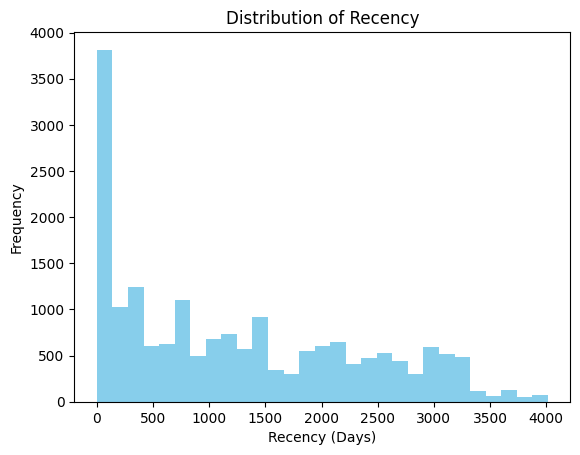

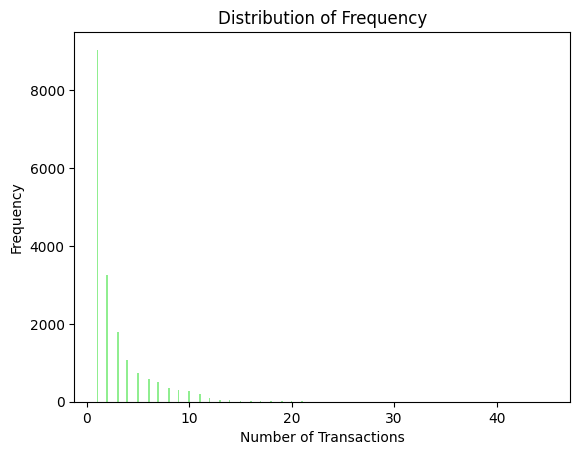

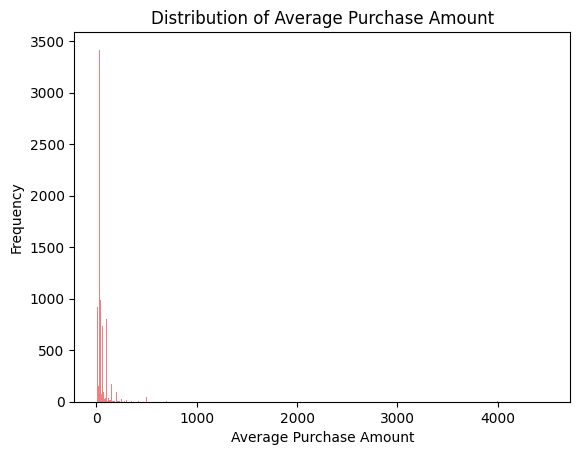

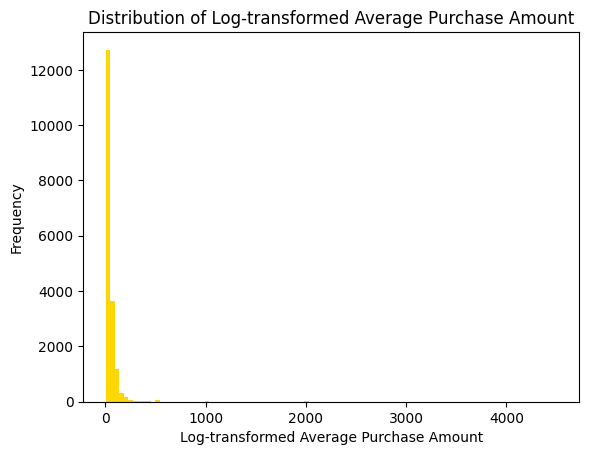

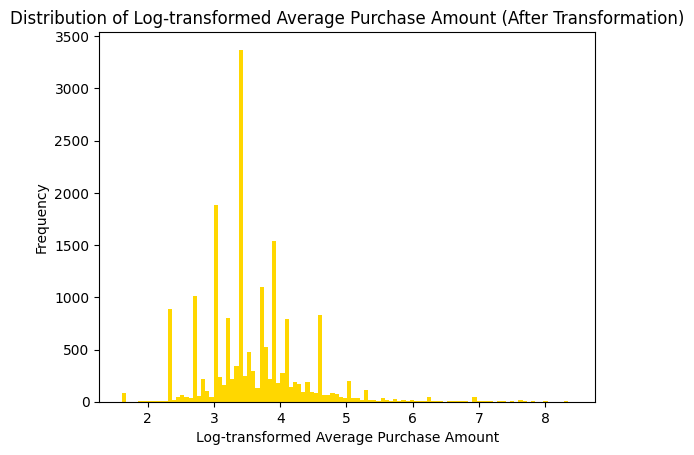

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import k_means
import matplotlib.pyplot as plt

# Load text file into a DataFrame
data = pd.read_csv('/content/purchases (2).txt', header=None, sep='\s+', engine='python', decimal='.')

# Add headers and interpret the last column as a date, extract year of purchase
data.columns = ['customer_id', 'purchase_amount', 'date_of_purchase']
data['date_of_purchase'] = pd.to_datetime(data['date_of_purchase'], format="%Y-%m-%d")
data['days_since'] = (pd.to_datetime("2016-01-01") - data['date_of_purchase']).dt.days

# Compute key marketing indicators
customers = data.groupby('customer_id').agg(recency=('days_since', 'min'),
                                            frequency=('customer_id', 'size'),
                                            amount=('purchase_amount', 'mean')).reset_index()

# Explore the data
print(customers.head())
print(customers.describe())

# Histogram of Recency
plt.hist(customers['recency'], bins='auto', color='skyblue')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency')
plt.show()

# Histogram of Frequency
plt.hist(customers['frequency'], bins='auto', color='lightgreen')
plt.title('Distribution of Frequency')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

# Histogram of Average Purchase Amount
plt.hist(customers['amount'], bins='auto', color='lightcoral')
plt.title('Distribution of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Histogram of Log-transformed Average Purchase Amount
plt.hist(customers['amount'], bins=100, color='gold')
plt.title('Distribution of Log-transformed Average Purchase Amount')
plt.xlabel('Log-transformed Average Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Preparing and transforming data
new_data = customers.copy()
new_data.set_index('customer_id', inplace=True)
new_data['amount'] = np.log(new_data['amount'])

# Histogram of Log-transformed Average Purchase Amount after Transformation
plt.hist(new_data['amount'], bins='auto', color='gold')
plt.title('Distribution of Log-transformed Average Purchase Amount (After Transformation)')
plt.xlabel('Log-transformed Average Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
!pip install -U scikit-learn # Update scikit-learn to the latest version

import pandas as pd
import numpy as np
from sklearn.cluster import k_means
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 53.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
from sklearn.cluster import KMeans
k = 8
model = KMeans(n_clusters=k, random_state=42)

sample_fraction = 0.1
customers_sample = customers.sample(frac=sample_fraction, random_state=42)
new_data_sample = new_data.loc[customers_sample['customer_id']]
customers_sample.reset_index(drop=True, inplace=True)

# Fit the model and get cluster labels
members = model.fit_predict(new_data_sample)

# Show profile of each segment
segment_profiles = pd.concat([customers_sample[['recency', 'frequency', 'amount']], pd.Series(members, name='segment')], axis=1)
segment_means = segment_profiles.groupby('segment').mean()

# Display the results
print(members[:30])
print(pd.Series(members).value_counts())
print(segment_means)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7b2673f9eb00>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


[1 2 3 4 7 7 6 7 0 6 4 4 6 4 3 5 3 3 7 1 4 3 1 3 0 0 4 5 0 7]
4    441
7    223
0    220
1    212
3    207
5    186
6    177
2    176
Name: count, dtype: int64
             recency  frequency     amount
segment                                   
0         372.718182   3.563636  58.634380
1        3206.551887   1.250000  35.028302
2        1638.125000   2.426136  49.542399
3        2137.690821   1.661836  34.746779
4          55.897959   4.501134  71.527245
5        1214.279570   2.569892  45.614221
6        2631.107345   1.576271  50.060499
7         783.309417   2.300448  47.240395


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('/content/purchases (2).txt', header=None, sep='\s+', engine='python', decimal='.')

# Add headers and interpret the last column as a date, extract year of purchase, and days since last purchase
data.columns = ['customer_id', 'purchase_amount', 'date_of_purchase']
data['date_of_purchase'] = pd.to_datetime(data['date_of_purchase'], format="%Y-%m-%d")
data['days_since'] = (pd.to_datetime("2016-01-01") - data['date_of_purchase']).dt.days

# Compute key marketing indicators
customers = data.groupby('customer_id').agg(recency=('days_since', 'min'),
                                        frequency=('customer_id', 'size'),
                                        amount=('purchase_amount', 'mean')).reset_index()

customers

,customer_id,recency,frequency,amount
0,10,3829,1,30.000000
1,80,343,7,71.428571
2,90,758,10,115.800000
3,120,1401,1,20.000000
4,130,2970,2,50.000000
...,...,...,...,...
18412,263820,1,1,10.000000
18413,263870,135,1,50.000000
18414,263880,34,1,20.000000
18415,263890,5,1,54.000000


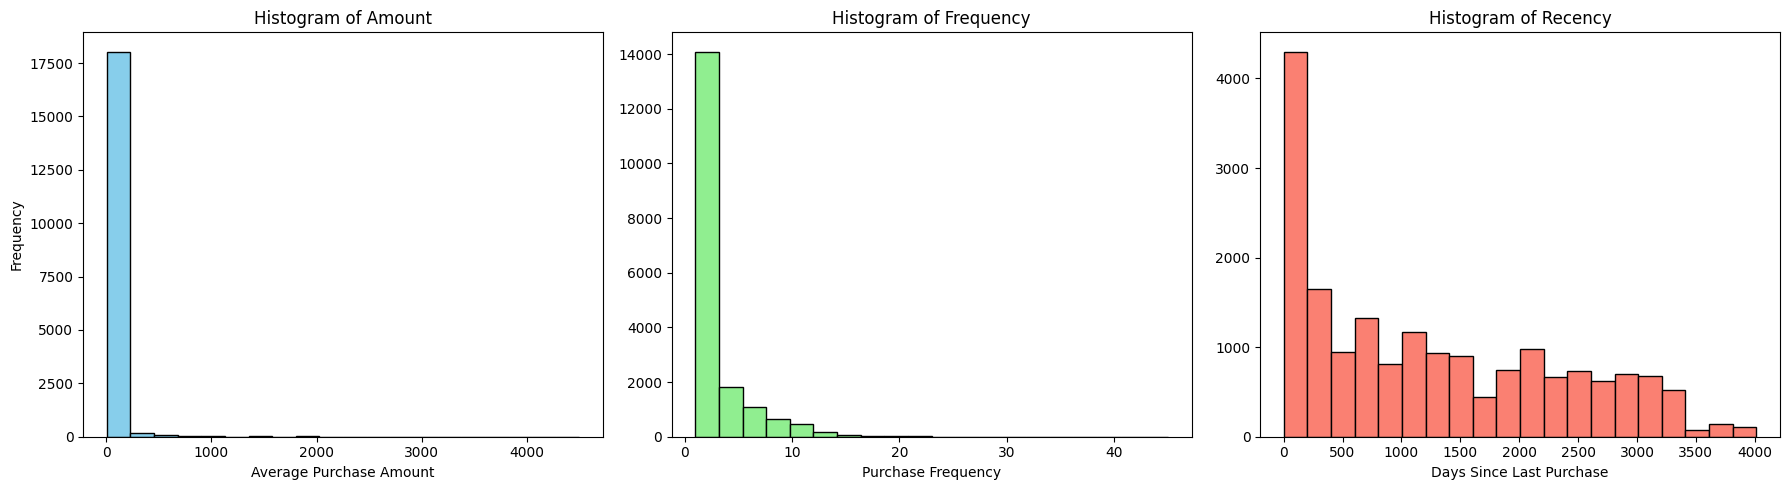

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for amount, frequency, and recency
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

# Amount histogram
axes[0].hist(customers['amount'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Amount')
axes[0].set_xlabel('Average Purchase Amount')
axes[0].set_ylabel('Frequency')

# Frequency histogram
axes[1].hist(customers['frequency'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram of Frequency')
axes[1].set_xlabel('Purchase Frequency')

# Recency histogram
axes[2].hist(customers['recency'], bins=20, color='salmon', edgecolor='black')
axes[2].set_title('Histogram of Recency')
axes[2].set_xlabel('Days Since Last Purchase')

plt.tight_layout()
plt.show()


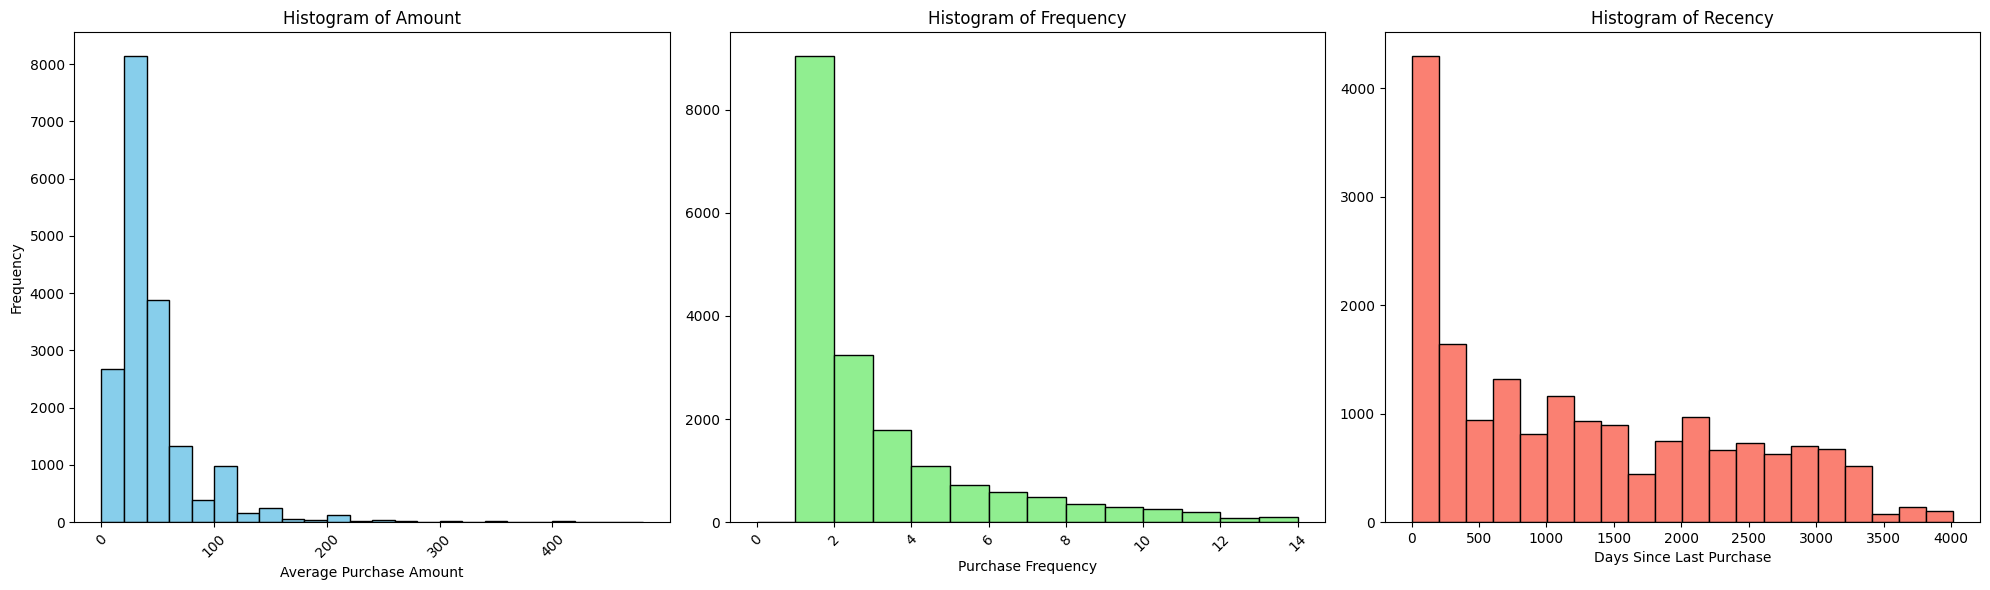

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot histograms for amount, frequency, and recency
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

# Amount histogram with improved clarity
axes[0].hist(customers['amount'], bins=np.arange(0, customers['amount'].quantile(0.99), 20), color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Amount')
axes[0].set_xlabel('Average Purchase Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(np.arange(0, customers['amount'].quantile(0.99), 100))  # Clearer x-axis ticks
axes[0].tick_params(axis='x', rotation=45)

# Frequency histogram with improved clarity
axes[1].hist(customers['frequency'], bins=range(0, int(customers['frequency'].quantile(0.99)) + 1, 1), color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram of Frequency')
axes[1].set_xlabel('Purchase Frequency')
axes[1].set_xticks(range(0, int(customers['frequency'].quantile(0.99)) + 1, 2))  # Adjusted tick spacing
axes[1].tick_params(axis='x', rotation=45)

# Recency histogram remains the same
axes[2].hist(customers['recency'], bins=20, color='salmon', edgecolor='black')
axes[2].set_title('Histogram of Recency')
axes[2].set_xlabel('Days Since Last Purchase')

plt.tight_layout()
plt.show()



In [ ]:
# Assigning R, F, and M scores based on conditions
customers['r_score'] = pd.cut(
    customers['recency'],
    bins=[-float('inf'), 365, 1095, float('inf')],
    labels=[3, 2, 1]
)

customers['f_score'] = pd.cut(
    customers['frequency'],
    bins=[-float('inf'), 1, 3, float('inf')],
    labels=[1, 2, 3]
)

customers['m_score'] = pd.cut(
    customers['amount'],
    bins=[-float('inf'), 30, 50, float('inf')],
    labels=[1, 2, 3]
)

# Displaying the updated customers DataFrame
customers

,customer_id,recency,frequency,amount,r_score,f_score,m_score
0,10,3829,1,30.000000,1,1,1
1,80,343,7,71.428571,3,3,3
2,90,758,10,115.800000,2,3,3
3,120,1401,1,20.000000,1,1,1
4,130,2970,2,50.000000,1,2,2
...,...,...,...,...,...,...,...
18412,263820,1,1,10.000000,3,1,1
18413,263870,135,1,50.000000,3,1,2
18414,263880,34,1,20.000000,3,1,1
18415,263890,5,1,54.000000,3,1,3


In [ ]:
# Group by r_score, f_score, m_score to ensure proper aggregation
segment_summary = customers.groupby(['r_score', 'f_score', 'm_score']).size().reset_index(name='count')

# Display the segment summary
print(segment_summary)



   r_score f_score m_score  count
0        3       1       1    766
1        3       1       2    291
2        3       1       3    407
3        3       2       1    540
4        3       2       2    382
5        3       2       3    445
6        3       3       1    833
7        3       3       2    750
8        3       3       3    984
9        2       1       1   1209
10       2       1       2    387
11       2       1       3    396
12       2       2       1    464
13       2       2       2    267
14       2       2       3    288
15       2       3       1    317
16       2       3       2    277
17       2       3       3    256
18       1       1       1   3610
19       1       1       2   1203
20       1       1       3    779
21       1       2       1   1504
22       1       2       2    690
23       1       2       3    461
24       1       3       1    396
25       1       3       2    275
26       1       3       3    240


<ipython-input-21-f17eec9d0067>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_summary = customers.groupby(['r_score', 'f_score', 'm_score']).size().reset_index(name='count')


In [ ]:
# Add the RFM column based on the scores
segment_summary['rfm_score'] = (
    segment_summary['r_score'].astype(int) * 100 +
    segment_summary['f_score'].astype(int) * 10 +
    segment_summary['m_score'].astype(int) * 1
)

# Display the updated segment summary
segment_summary


,r_score,f_score,m_score,count,rfm_score
0,3,1,1,766,311
1,3,1,2,291,312
2,3,1,3,407,313
3,3,2,1,540,321
4,3,2,2,382,322
5,3,2,3,445,323
6,3,3,1,833,331
7,3,3,2,750,332
8,3,3,3,984,333
9,2,1,1,1209,211


In [ ]:

from tabulate import tabulate

# Define the data
data = {
    "Segment": ["Segment 1", "Segment 2", "Segment 3", "Segment 4", "Segment 5", "Segment 6"],
    "RFM Scores": [
        "111, 112, 113, 121, 122, 123, 131, 132, 133",  # Segment 1
        "311, 312, 313",                                # Segment 2
        "213, 221, 222, 223, 231, 232, 233",            # Segment 3
        "211, 212",                                     # Segment 4
        "322, 323, 332, 333",                           # Segment 5
        "331, 321"                                      # Segment 6
    ],
    "Segment Name": [
        "Inactive Customers (Recency =36+ months)",                           # Segment 1
        "New Active (Recency<12 months and Frequency = 1)",                                   # Segment 2
        "Warm & Cold Frequent High-Value Buyers (Recency = 13-36 months)",       # Segment 3
        "Warm & Cold Infrequent Low Spenders (Recency = 13-36 months)",          # Segment 4
        "Active High Value (Recency < 12 months )",                            # Segment 5
        "Active Low Value  (Recency < 12 months )"                              # Segment 6
    ]
}

# Create the DataFrame
segment_df = pd.DataFrame(data)

# Display the table using tabulate
print(tabulate(segment_df, headers="keys", tablefmt="fancy_grid", showindex=False))


╒═══════════╤═════════════════════════════════════════════╤═════════════════════════════════════════════════════════════════╕
│ Segment   │ RFM Scores                                  │ Segment Name                                                    │
╞═══════════╪═════════════════════════════════════════════╪═════════════════════════════════════════════════════════════════╡
│ Segment 1 │ 111, 112, 113, 121, 122, 123, 131, 132, 133 │ Inactive Customers (Recency =36+ months)                        │
├───────────┼─────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────┤
│ Segment 2 │ 311, 312, 313                               │ New Active (Recency<12 months and Frequency = 1)                │
├───────────┼─────────────────────────────────────────────┼─────────────────────────────────────────────────────────────────┤
│ Segment 3 │ 213, 221, 222, 223, 231, 232, 233           │ Warm & Cold Frequent High-Value Buyers (Recency = 13-36 mo